<img src="../img/UAX.png" width="300">

# AutoEncoder - Creación de imágenes

### Profesor: Jorge Calvo

Los Autoencoders son una clase especial de redes neuronales que se utilizan para la compresión y reconstrucción de datos. Su objetivo principal es aprender a representar eficientemente la información de entrada en una capa oculta y luego reconstruirla con la menor pérdida de calidad posible.

Imagina que tienes una imagen de un gato y quieres comprimirla en una representación más pequeña y simple, pero aún así quieres poder reconstruir la imagen original. Aquí es donde entran en juego los Autoencoders.

El Autoencoder consta de dos partes principales: el codificador y el decodificador. El codificador se encarga de comprimir los datos de entrada en una representación de menor dimensionalidad, mientras que el decodificador se encarga de reconstruir los datos originales a partir de esta representación comprimida.

El proceso de entrenamiento de un Autoencoder implica alimentar el modelo con los datos de entrada, y el objetivo es minimizar la diferencia entre la entrada original y la salida reconstruida. A medida que el modelo se entrena, el codificador aprende a capturar las características más importantes de los datos de entrada y el decodificador aprende a utilizar esas características para reconstruir la información original.

<img src="https://github.com/jmcalvomartin/python/blob/master/img/autoencoder.png?raw=True" width="800">


Referencia: https://www.europeanvalley.es/noticias/el-espacio-latente-en-la-ia/

### Ejercicio usando el dataset MNIST
El dataset MNIST es uno de los conjuntos de datos más populares en el campo del aprendizaje automático y la visión por computadora. MNIST representa el conjunto de dígitos escritos a mano del 0 al 9, donde cada imagen es una representación de 28x28 píxeles en escala de grises.

Imagina que tienes una hoja de papel y un lápiz. Ahora, trata de escribir un número del 0 al 9 en la hoja. Después de escribir cada número, escaneas la hoja y obtienes una imagen digital. Esa imagen digital se parece mucho a las imágenes en el conjunto de datos MNIST.

Este conjunto de datos es ampliamente utilizado para entrenar y probar algoritmos de clasificación, ya que proporciona una buena representación de los desafíos comunes en la clasificación de imágenes, como la variabilidad en la escritura a mano, la calidad de la imagen y la resolución.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, models, losses, backend as K
from tensorflow.keras.datasets import mnist
from keras.models import Model, load_model
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Solo mostrar errores y advertencias críticas

# Configurar el crecimiento de memoria en la GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
print("GPUs disponibles: ", tf.config.experimental.list_physical_devices('GPU'))


GPUs disponibles:  []


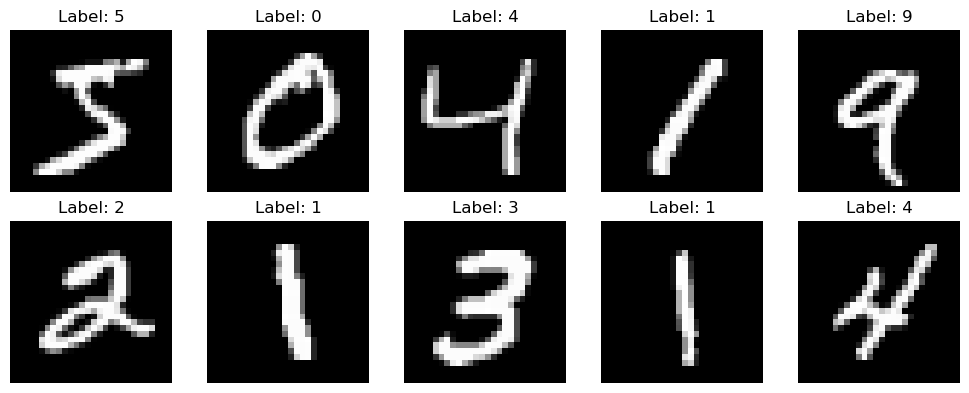

In [2]:
# Descargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Visualizar algunas imágenes de entrenamiento
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axs.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

### Autoencoders con capas planas

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los datos
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Definir la arquitectura del Autoencoder
encoder_input = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Flatten()(encoder_input)
x = tf.keras.layers.Dense(784, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
encoded = tf.keras.layers.Dense(3, activation='relu')(x)

decoded = tf.keras.layers.Dense(32, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(784, activation='softmax')(decoded)
decoded = tf.keras.layers.Reshape((28, 28, 1))(decoded)

In [4]:
# Crear el modelo Autoencoder
autoencoder_plano = tf.keras.Model(encoder_input, decoded)

plot_model(autoencoder_plano, to_file='./red_plana.png', show_shapes=True, show_layer_names=True, dpi=96)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Autoencoders con Capas convolucionales
La operación de UpSampling consiste en duplicar los valores de una imagen o volumen en ambas dimensiones (alto y ancho). Esto se hace para aumentar el tamaño de la imagen o volumen sin perder información importante.

En TensorFlow, la capa de UpSampling se implementa mediante la clase UpSampling2D para imágenes 2D y UpSampling3D para volúmenes 3D. Ambas capas toman un parámetro size que especifica la escala de aumento en cada dimensión. Por ejemplo, si size es igual a 2, la imagen o volumen se duplicará en ambas dimensiones.

Es importante tener en cuenta que la capa de UpSampling no agrega información nueva, sino que repite los valores existentes. Por lo tanto, es esencial que la información relevante ya esté presente en las capas anteriores de la red.

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los datos
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Definir la arquitectura del Autoencoder
encoder_input = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32,(3,3), padding="same", name="Cov1")(encoder_input)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(64,(3,3), padding="same", name="Cov2")(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128)(x)
x = tf.keras.layers.Dense(32)(x)

encoded = tf.keras.layers.Dense(15, name="BottleNeck")(x)

decoded = tf.keras.layers.Dense(64)(encoded)
decoded = tf.keras.layers.Dense(196)(decoded)
decoded = tf.keras.layers.Reshape((14,14,1))(decoded)
decoded = tf.keras.layers.Conv2DTranspose(2, (3, 3), padding='same', name="Cov2.T")(decoded)
decoded = tf.keras.layers.UpSampling2D((2, 2))(decoded)
decoded = tf.keras.layers.Conv2DTranspose(1, (3, 3), padding='same',name="Cov1.T",activation="sigmoid")(decoded)
decoded = tf.keras.layers.Reshape((28, 28, 1))(decoded)

In [20]:
# Crear el modelo Autoencoder
autoencoder = tf.keras.Model(encoder_input, decoded)

plot_model(autoencoder, to_file='./red_convolucional.png', show_shapes=True, show_layer_names=True, dpi=96)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [21]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 Cov1 (Conv2D)               (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 Cov2 (Conv2D)               (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 3136)              0   

In [22]:
# Compilar el modelo
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Entrenar el modelo
history=autoencoder.fit(x_train, x_train, epochs=5, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

#Salvar los pesos del modelo
#autoencoder.save_weights('autoencoder_weights.h5')

Epoch 1/5
469/469 [==============================] - 45s 87ms/step - loss: 0.1799 - val_loss: 0.1347
Epoch 2/5
469/469 [==============================] - 38s 82ms/step - loss: 0.1323 - val_loss: 0.1278
Epoch 3/5
469/469 [==============================] - 40s 85ms/step - loss: 0.1289 - val_loss: 0.1268
Epoch 4/5
469/469 [==============================] - 39s 84ms/step - loss: 0.1276 - val_loss: 0.1258
Epoch 5/5
469/469 [==============================] - 32s 67ms/step - loss: 0.1267 - val_loss: 0.1245


313/313 [==============================] - 2s 7ms/step


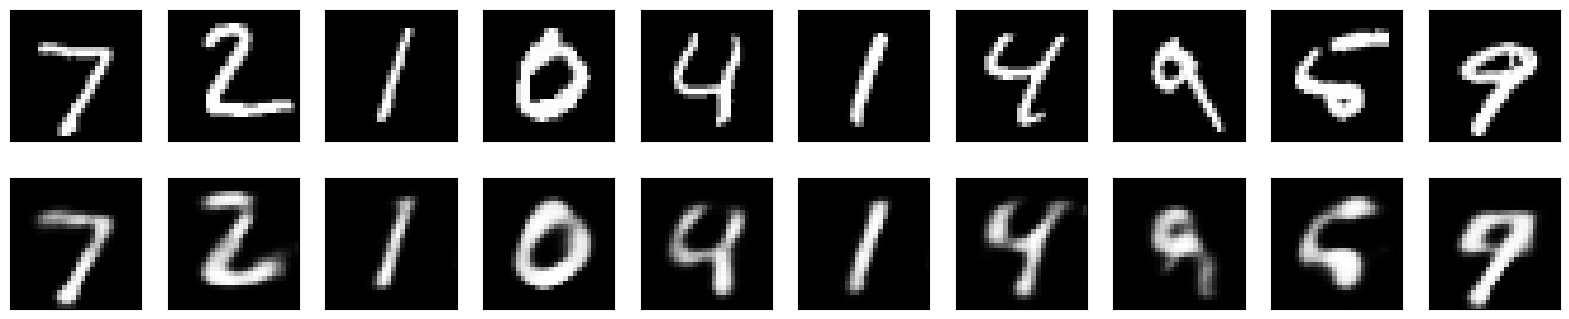

In [23]:
# Reconstruir imágenes de prueba
decoded_images = autoencoder.predict(x_test)

# Mostrar algunas imágenes originales y reconstruidas
n = 10  # Número de imágenes a mostrar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagen reconstruida
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()